<a href="https://colab.research.google.com/github/maricamolesi/Iniciacao-Cientifica/blob/master/Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
"""
Created on Thu Nov 21 16:47:32 2019

@author: Mariana
"""

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from matplotlib import pyplot

**CARREGAMENTO DA MATRIZ DE VETORES CARACTERÍSTICOS E VETOR DAS CLASSES**

In [ ]:
#Matriz de descritores extraídos pela rede neural
MATRIX_NEURALNETWORK = np.load('/content/drive/My Drive/ProjetoIC/CITA/FEATURES_CORROIDO.npy')

#Matriz de descritores extraídos pelo modelo de automâtos celulares
MATRIX_CITA = np.load('/content/drive/My Drive/ProjetoIC/CITA/CITA-CORROIDO.npy')

#Vetor das classes
LABELS = np.loadtxt('/content/drive/My Drive/ProjetoIC/CITA/LABELS.txt')

**ALGUNS CLASSIFICADORES E SEUS RESULTADOS**

In [10]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

RESULTADOS DOS VETORES CARACTERÍSTICOS - CITA
LDA: 0.895946 (0.006213)
KNN: 0.229505 (0.010269)
CART: 0.282207 (0.015975)
RF: 0.323311 (0.010040)
NB: 0.266667 (0.009379)
SVM: 0.174662 (0.009441)


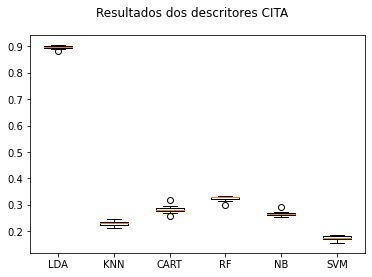

In [11]:
results = []
names = []

print("RESULTADOS DOS VETORES CARACTERÍSTICOS - CITA")

for name, model in models:
    kfold = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)
    cv_results = cross_val_score(model, MATRIX_CITA, LABELS, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultados dos descritores CITA')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

RESULTADOS DOS VETORES CARACTERÍSTICOS - TREINAMENTO NA REDE
LDA: 0.964077 (0.005840)
KNN: 0.941779 (0.004779)
CART: 0.669707 (0.011736)
RF: 0.948086 (0.005618)
NB: 0.553266 (0.028108)
SVM: 0.959910 (0.006193)


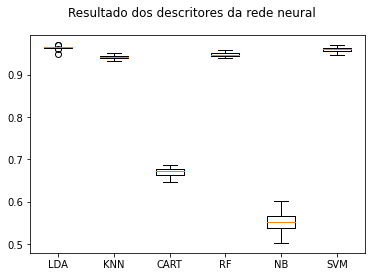

In [12]:
results = []
names = []

print("RESULTADOS DOS VETORES CARACTERÍSTICOS - TREINAMENTO NA REDE")

for name, model in models:
    kfold = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)
    cv_results = cross_val_score(model, MATRIX_NEURALNETWORK, LABELS, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultado dos descritores da rede neural')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()